In [1]:
import numpy as np
import pandas as pd
import json
import os

from susy_qm import create_vqe_plots

In [2]:
folder_path = r"C:\Users\Johnk\OneDrive\Desktop\PhD 2024\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\DE Test\OptFiles"
potential = 'DW'
cutoff = 16

dataframes = {}

folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

converged_runs = []
mean_iters = []
min_e = []
delta_min_e = []
median_e = []
delta_median_e = []
exact_e = []
time_taken = []

num_vqe = []
shots = []
tolerance = []
abs_tolerance = []
strategy = []
popsize = []
maxiter = []


for f in folders:

    data_path = folder_path + "\\{}\\{}_{}.json".format(f,f, cutoff)
    
    with open(data_path, 'r') as file:
        data = json.load(file)

    num_vqe.append(data['num_VQE'])
    shots.append(data['shots'])

    optimzer = data['Optimizer']
    maxiter.append(optimzer['maxiter'])
    tolerance.append(optimzer['tolerance'])
    abs_tolerance.append(optimzer['abs_tolerance'])
    strategy.append(optimzer['strategy'])
    popsize.append(optimzer['popsize'])

    #success = sum(data['success'])
    
    exact_min_e = np.min(data['exact_eigenvalues'])
    exact_e.append(exact_min_e)

    converged_runs.append(sum(data['success']))
    mean_iters.append(int(np.round(np.mean(data['num_iters']))))
    min_e.append(np.min(data['results']))
    delta_min_e.append(abs(exact_min_e - np.min(data['results'])))
    median_e.append(np.median(data['results']))
    delta_median_e.append(abs(exact_min_e - np.median(data['results'])))
    
    time_taken.append(data['total_run_time'])

    

In [3]:
df = pd.DataFrame({
    'folder': folders,
    'num_vqe': num_vqe,
    'shots': shots,
    'tolerance': tolerance,
    'abs_tolerance': abs_tolerance,
    'strategy': strategy,
    'popsize': popsize,
    'Converged Runs': [f"{c}/80" for c in converged_runs],
    'maxiter': maxiter,
    'Mean Iter': mean_iters,
    #'VQE min E': [f"{num:.5e}" for num in min_e],
    'Delta min E': [f"{num:.5e}" for num in delta_min_e],
    #'VQE median E': [f"{num:.5e}" for num in median_e],
    'Delta median E': [f"{num:.5e}" for num in delta_median_e],
    'Exact': [f"{num:.5e}" for num in exact_e],
    'Time': time_taken
})

In [4]:
df.sort_values(['Delta min E', 'Delta median E'], ascending=[False,False])

,folder,num_vqe,shots,tolerance,abs_tolerance,strategy,popsize,Converged Runs,maxiter,Mean Iter,Delta min E,Delta median E,Exact,Time
1,DW,80,1024,0.001,0.001,randtobest1bin,20,74/80,10000,4063,7.31637e-14,4.15834e-05,8.91599e-01,0:31:49.518239
0,AHO,80,1024,0.001,0.001,randtobest1bin,20,80/80,10000,400,4.05626e-13,4.05626e-13,-1.16698e-03,0:03:28.789559
2,QHO,80,1024,0.001,0.001,randtobest1bin,20,80/80,10000,82,0.00000e+00,0.00000e+00,0.00000e+00,0:00:41.552161


Creating plots
Saving individual plot for cutoff 16
Done
Creating plots
Saving individual plot for cutoff 16
Done
Creating plots
Saving individual plot for cutoff 16
Done


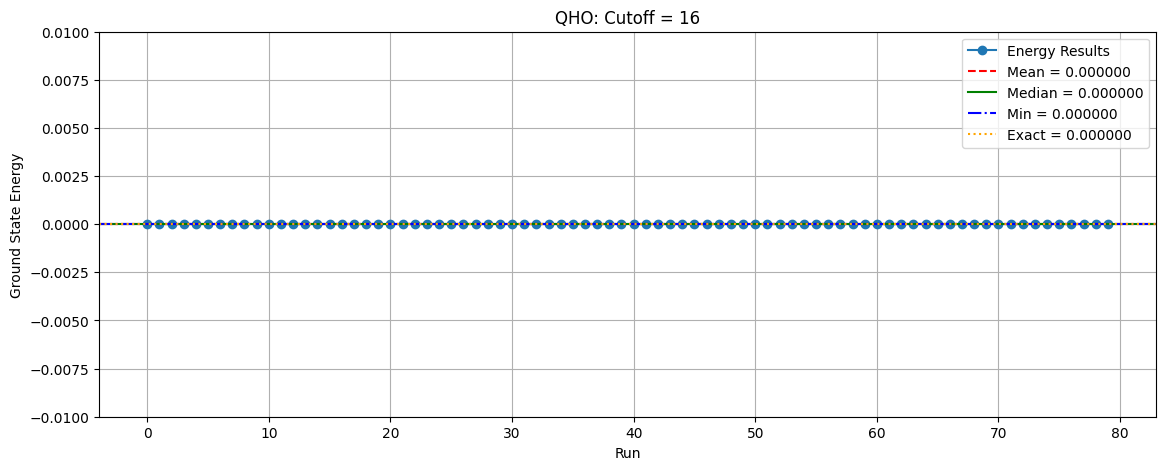

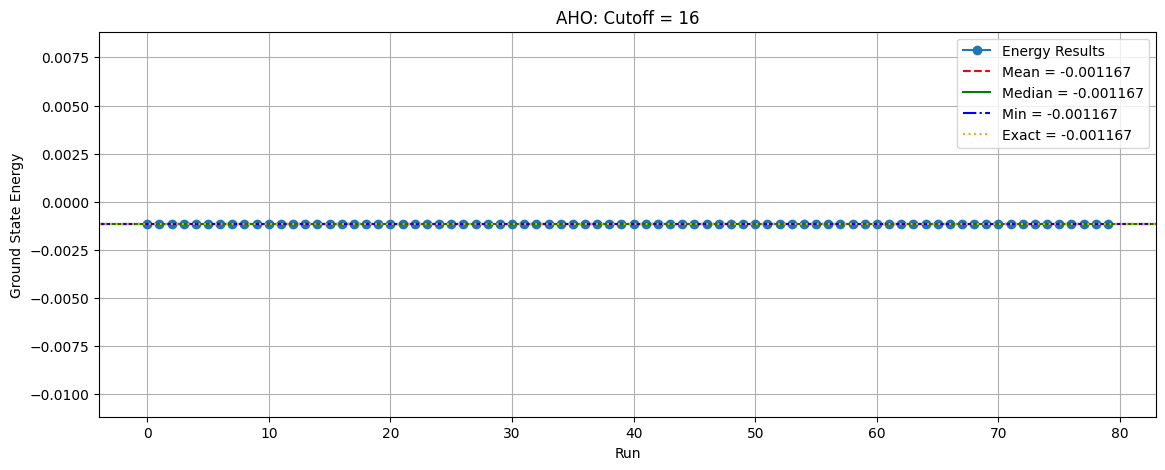

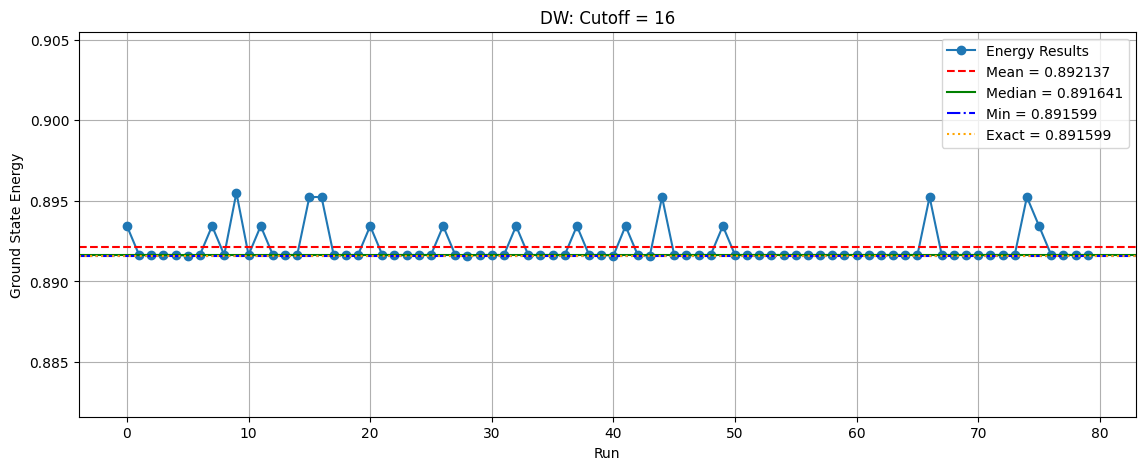

In [5]:
path = r"C:\Users\Johnk\OneDrive\Desktop\PhD 2024\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\DE Test\OptFiles\{}\\"
cut_off_list=[16]
for potential in ['QHO', 'AHO', 'DW']:
    create_vqe_plots(potential=potential, base_path=path, cut_off_list=cut_off_list, individual=True)